In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### 2017-2023 NFL QB Fantasy Scores (Training Data)

In [91]:
file_names = [f"data/reshaped/{year}.csv" for year in range(2017, 2023)]
columns_drop = ["Unnamed: 0", "Score_3_weeks_ago", "Score_4_weeks_ago", "Score_5_weeks_ago", "Score_6_weeks_ago", "Score_7_weeks_ago", "Score_8_weeks_ago", "Score_9_weeks_ago", "Score_10_weeks_ago", "Score_11_weeks_ago", "Score_12_weeks_ago", "Score_13_weeks_ago", "Score_14_weeks_ago", "Score_15_weeks_ago", "Score_16_weeks_ago", "Score_17_weeks_ago", "Score_18_weeks_ago"]
train_df = pd.concat([pd.read_csv(file_name) for file_name in file_names]).drop(columns_drop, axis=1)
train_df.fillna(method='ffill', inplace=True)
train_df.head(5)

,Unnamed: 0,Team,Name,Rating,Score,Home_Away,Opponent,Week,Score_1_weeks_ago,Score_2_weeks_ago,...,Score_9_weeks_ago,Score_10_weeks_ago,Score_11_weeks_ago,Score_12_weeks_ago,Score_13_weeks_ago,Score_14_weeks_ago,Score_15_weeks_ago,Score_16_weeks_ago,Score_17_weeks_ago,Score_18_weeks_ago
0,136,49ers,Brian Hoyer,75,3.2,Home,84,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,137,49ers,Brian Hoyer,75,2,Away,81,2,3.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,138,49ers,Brian Hoyer,75,26.2,Home,82,3,2,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139,49ers,Brian Hoyer,75,7.7,Away,81,4,26.2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140,49ers,Brian Hoyer,75,22.1,Away,72,5,7.7,26.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
train_df["Home_Away"].value_counts()

Home_Away
Away    1770
Home    1762
Bye      912
Name: count, dtype: int64

In [93]:
train_df["Score"].value_counts()

Score
-       1359
BYE      113
0         31
15.6      25
16.5      25
        ... 
36.3       1
37.9       1
34.1       1
38.5       1
42.6       1
Name: count, Length: 404, dtype: int64

In [94]:
train_df = train_df[train_df["Home_Away"].isin(["Home", "Away"])]
train_df = train_df[~train_df["Score"].isin(["0", "BYE", "-0.1", "-"])]

In [99]:
train_df["Score_1_weeks_ago"].value_counts()

Score_1_weeks_ago
-       294
BYE      67
16.5     20
17       17
17.2     17
       ... 
4.4       1
37.9      1
36.9      1
31.5      1
42.6      1
Name: count, Length: 379, dtype: int64

In [102]:
train_df.replace(["0", "BYE", "-0.1", "-"], np.nan, inplace=True)
train_df.head()

,Unnamed: 0,Team,Name,Rating,Score,Home_Away,Opponent,Week,Score_1_weeks_ago,Score_2_weeks_ago,...,Score_9_weeks_ago,Score_10_weeks_ago,Score_11_weeks_ago,Score_12_weeks_ago,Score_13_weeks_ago,Score_14_weeks_ago,Score_15_weeks_ago,Score_16_weeks_ago,Score_17_weeks_ago,Score_18_weeks_ago
0,136,49ers,Brian Hoyer,75,3.2,Home,84,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,137,49ers,Brian Hoyer,75,2,Away,81,2,3.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,138,49ers,Brian Hoyer,75,26.2,Home,82,3,2,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,139,49ers,Brian Hoyer,75,7.7,Away,81,4,26.2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,140,49ers,Brian Hoyer,75,22.1,Away,72,5,7.7,26.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
for col in ['Score_1_weeks_ago', 'Score_2_weeks_ago']:
    train_df[col + '_missing'] = train_df[col].isnull().astype(int)
    train_df[col] = train_df[col].fillna(0)
train_df

,Unnamed: 0,Team,Name,Rating,Score,Home_Away,Opponent,Week,Score_1_weeks_ago,Score_2_weeks_ago,...,Score_11_weeks_ago,Score_12_weeks_ago,Score_13_weeks_ago,Score_14_weeks_ago,Score_15_weeks_ago,Score_16_weeks_ago,Score_17_weeks_ago,Score_18_weeks_ago,Score_1_weeks_ago_missing,Score_2_weeks_ago_missing
0,136,49ers,Brian Hoyer,75,3.2,Home,84,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,137,49ers,Brian Hoyer,75,2,Away,81,2,3.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,138,49ers,Brian Hoyer,75,26.2,Home,82,3,2,3.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,139,49ers,Brian Hoyer,75,7.7,Away,81,4,26.2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,140,49ers,Brian Hoyer,75,22.1,Away,72,5,7.7,26.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,841,Vikings,Kirk Cousins,80,25,Away,81,14,11.8,22.9,...,18.3,11.8,19.1,14.4,19.8,2.9,19.3,NaN,0,0
806,842,Vikings,Kirk Cousins,80,34.4,Home,77,15,25,11.8,...,13.9,18.3,11.8,19.1,19.8,2.9,19.3,NaN,0,0
807,843,Vikings,Kirk Cousins,80,24.2,Home,73,16,34.4,25,...,23.2,13.9,18.3,11.8,19.1,2.9,19.3,NaN,0,0
808,844,Vikings,Kirk Cousins,80,10.9,Away,84,17,24.2,34.4,...,16.5,23.2,13.9,18.3,11.8,19.1,19.3,NaN,0,0


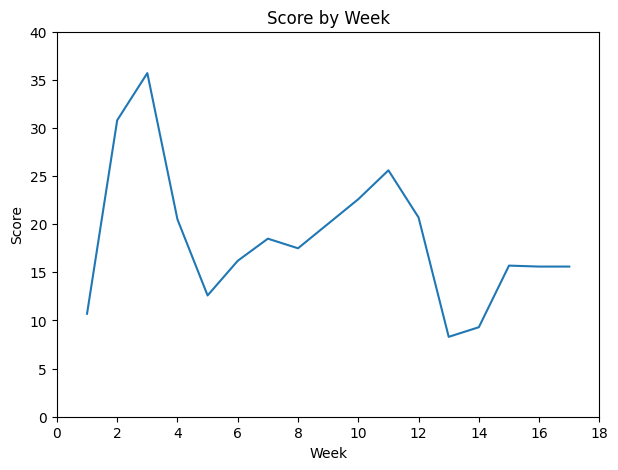

In [58]:
tom_brady = train_df[train_df['Name'] == 'Tom Brady'].head(17).drop(index=1096)
tom_brady['Week'] = pd.to_numeric(tom_brady['Week'])
tom_brady['Score'] = pd.to_numeric(tom_brady['Score'])
plt.figure(figsize=(7, 5))
plt.plot(tom_brady['Week'], tom_brady['Score'])
plt.title('Score by Week')
plt.xlabel('Week')
plt.ylabel('Score')
plt.ylim(0,40)
plt.xlim(0,18)
plt.show()


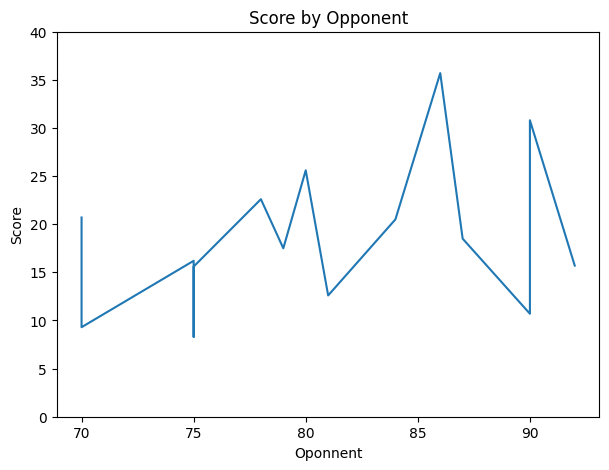

In [62]:
tom_brady['Opponent'] = pd.to_numeric(tom_brady['Opponent'])
tom_brady['Score'] = pd.to_numeric(tom_brady['Score'])
tom_brady = tom_brady.sort_values(by='Opponent')
plt.figure(figsize=(7, 5))
plt.plot(tom_brady['Opponent'], tom_brady['Score'])
plt.title('Score by Opponent')
plt.xlabel('Oponnent')
plt.ylabel('Score')
plt.ylim(0,40)
plt.show()

In [70]:
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '-'